# Tarefa 1 - Combinação de modelos II

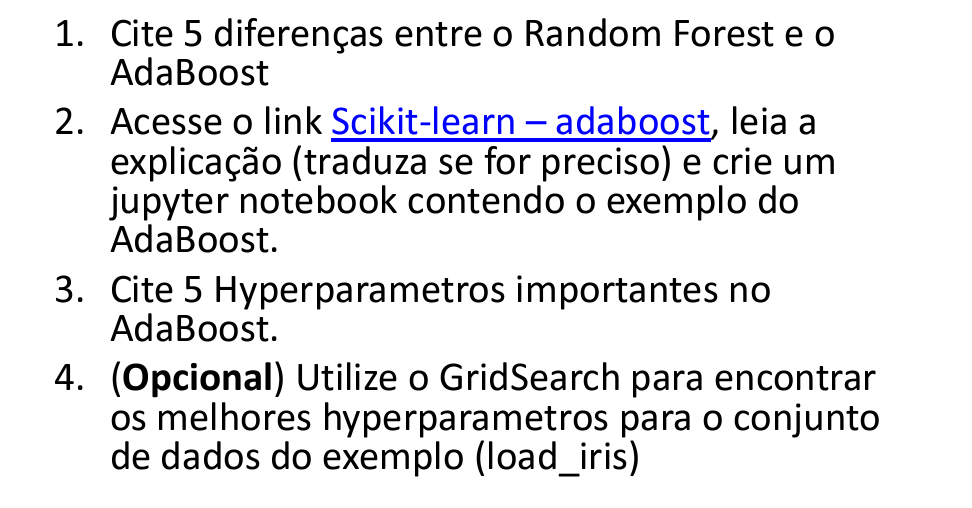

**Link:** [Scikit-learn – adaboost](https://scikit-learn.org/stable/modules/ensemble.html)

#### 5 diferenças entre o Random Forest e o AdaBoost

1. No Random Forest é gerado várias árvores completas, enquanto no AdaBoost é contruído uma floresta de stumps, onde as árvores são mais simples.
2. No Random Forest cada árvore é independente e gera uma resposta paralelamente, no AdaBoost é gerado um stump que influencia no proxímo e assim por diante.
3. No Random Forest todas as árvores tem o mesmo peso na decisão final, no AdaBoost as respostas tem pesos diferentes pela classificação boa ou ruim.
4. No Random Forest é mais robusto ao overfitting devido à aleatoriedade introduzida na seleção de amostras, no AdaBoost pode haver mais overfitting do que o RF se houver muito ruído nos dados de treinamento.
5.  No Random Forest a predição do conjunto é dada como a média de predição dos classificadores individuais, já no AdaBoost previsões então combinados através de um voto de maioria ponderada (ou soma) para produzir a previsão final.

**Código com os 5 hyperparâmetros**

In [6]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

In [7]:
X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100,           
                        algorithm="SAMME",          
                        learning_rate=0.5,         
                        random_state=10,           
                        estimator=None)
    
scores = cross_val_score(clf, X, y, cv = 5)
scores.mean()

0.9533333333333334

**Código com o GridSearch**

In [11]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

melhor_params = grid_search.best_params_
melhor_score = grid_search.best_score_

print(f"Melhores hiperparâmetros: {melhor_params}")
print(f"Melhor acurácia: {melhor_score:.3f}")

Melhores hiperparâmetros: {'learning_rate': 0.1, 'n_estimators': 200}
Melhor acurácia: 0.960
